In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm


2023-01-20 18:06:29.477490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('metaclonotypes_tcrdist_3groups.csv')
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label,file
0,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 15 0 0 0 0 0 0 9 17 3 16 ...,20,0
1,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 15 0 0 0 0 0 0 9 17 3 16 ...,20,0
2,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 15 0 0 0 0 0 0 9 17 3 16 ...,20,0
3,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 15 0 0 0 0 0 0 9 17 3 16 ...,20,0
4,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 10 0 0 0 0 0 0 15 17 3 16 ...,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,CASSPGGSEQYF,CASSP--------GGSEQYF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGSEQYF+TCRBV18-01+TCRBJ02-07,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eXL30,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ02-07,DTDFVNEFYAY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 13 0 0 0 0 0 0 0 0 6 6 ...,50,2
3499,CASSPGGTGYTF,CASSP--------GGTGYTF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGTGYTF+TCRBV18-01+TCRBJ01-02,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-02,DTDFVNEFYAY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 13 0 0 0 0 0 0 0 0 6 6 ...,50,2
3500,CASSPGGQKLFF,CASSP--------GGQKLFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGQKLFF+TCRBV18-01+TCRBJ01-04,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eXL30,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-04,DTDFVNEFYAY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 13 0 0 0 0 0 0 0 0 6 6 ...,50,2
3501,CASSPGGTRLFF,CASSP--------GGTRLFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGTRLFF+TCRBV18-01+TCRBJ01-04,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-04,DTDFVNEFYAY,[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[ 2 1 16 16 13 0 0 0 0 0 0 0 0 6 6 ...,50,2


In [3]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q","R", "S", "T", "V", "W", "Y", "-"]

# integer encode
label_encoder = LabelEncoder()
y_encoder =LabelEncoder()
y_encoder = y_encoder.fit(df['Amino Acids'].unique())
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = label_encoder.fit_transform(aa)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
one_hot_status = False
col_one_hot = []
col_integer = []
y_labels = []
for k in tqdm(df.index):
    integer_encoded = label_encoder.transform(list(df.loc[k,"CDR3_al"]))
    col_integer.append(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    if one_hot_status:
        onehot_encoded = onehot_encoder.transform(integer_encoded)
        col_one_hot.append(onehot_encoded)
    y_label = y_encoder.transform([df.loc[k,"Amino Acids"]])
    y_labels.append(y_label)
    

  0%|          | 0/3503 [00:00<?, ?it/s]

In [5]:
y_labels = [int(y) for y in y_labels]
if one_hot_status:
    df["CDR3_al_one_hot"] = col_one_hot
df["CDR3_al_integer"] = col_integer
df["label"] = y_labels

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
values = np.stack(df["CDR3_al_integer"].to_numpy())
X_train = tf.constant(values)
n_inputs = 20
print(len(X_train))
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=1)

2023-01-20 18:06:32.604239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3503
Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 51.0025
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 13.4651
Epoch 3/100
219/219 [==============================] - 0s 964us/step - loss: 3.6692
Epoch 4/100
219/219 [==============================] - 0s 905us/step - loss: 2.1093
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 2.0231
Epoch 6/100
219/219 [==============================] - 0s 950us/step - loss: 1.8170
Epoch 7/100
219/219 [==============================] - 0s 919us/step - loss: 1.9065
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 1.7004
Epoch 9/100
219/219 [==============================] - 0s 980us/step - loss: 1.5824
Epoch 10/100
219/219 [==============================] - 0s 957us/step - loss: 1.7680
Epoch 11/100
219/219 [==============================] - 0s 979us/step - loss: 1.4721
Epoch 12/100
219/219 [==============================] - 0s 974us/step - los

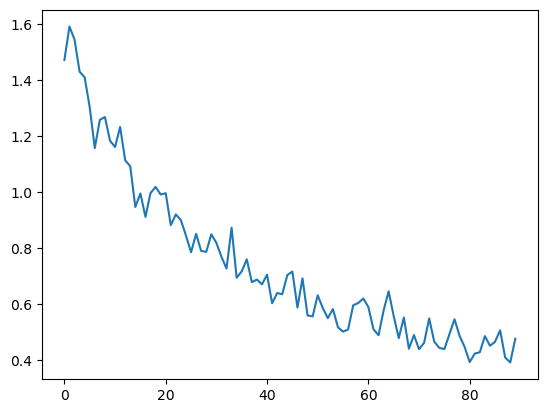

In [8]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'][10:], label='train')

In [9]:
encoder = Model(inputs=visible, outputs=bottleneck)

7/7 [==============================] - 0s 750us/step


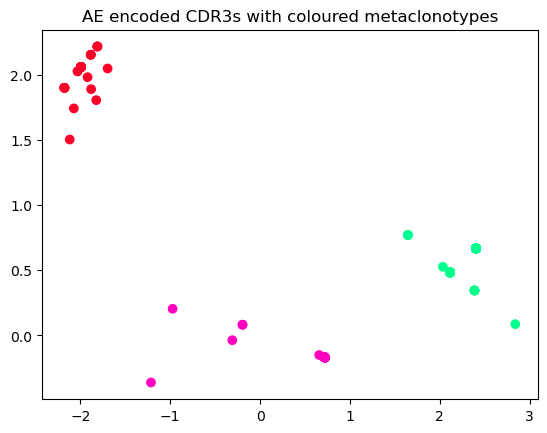

In [12]:
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["label"].nunique())
df["label_color"] = df["label"].apply(lambda x: rgb_values[x])
N = 200
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], c=(df['file'][:N]), cmap='gist_rainbow')
#Plot text labels 
#for i in range(N):
    #plt.text(X_test_encode[i,0], X_test_encode[i,1], df['file'][i], fontsize=9)
plt.title('AE encoded CDR3s with coloured metaclonotypes')
plt.show()